In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print("Positive: ", len(all_positive_tweets))
print("Negative: ", len(all_negative_tweets))


Positive:  5000
Negative:  5000


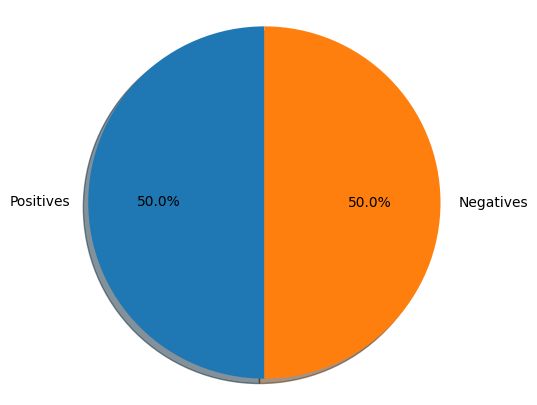

In [5]:
fig = plt.figure(figsize=(5,5))
labels = ['Positives', 'Negatives']
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

plt.pie(sizes, labels=labels, startangle=90, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [6]:
print('\033[92m',all_positive_tweets[random.randint(0,5000)])
print('\033[91m',all_negative_tweets[random.randint(0,5000)])


 @Sweetiepiie67 have a great day hunny :)
 @riseagainst why you don't come to Barcelona this year? :( won't be able to see you in Madrid or Bilbao...


**Preprocessing**

In [7]:
tweet = all_positive_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

**Remove hyperlinks, Twitter marks and styles**

In [9]:
print('\033[92m',tweet)

 My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
print('\033[94m')
tweet2 = re.sub(r'^RT[\s]+','',tweet)
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet2)
tweet2 = re.sub(r'#','',tweet2)
print(tweet2)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


**Tokenize the String**

In [11]:
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer=TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


**Remove stop words and punctuations**

In [12]:
stopwords_english = stopwords.words('english')
print("Stop Words:\n",stopwords_english)
print("Punctuations:\n",string.punctuation)

Stop Words:
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [13]:
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:
    if word not in stopwords_english and word not in string.punctuation:
        tweets_clean.append(word)
print(tweets_clean)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


**Stemming**

In [14]:
print('\033[94m')
stemmer = PorterStemmer()
tweets_stem=[]

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)
print(tweets_stem)


['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [15]:
def process_tweet(tweet):
    tweet = re.sub(r'\$\w*','',tweet)
    tweet = re.sub(r'^RT[\s]+','',tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*','',tweet)
    tweet = re.sub(r'#','',tweet)

    tokenizer=TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    stop_words = stopwords.words('english')
    stemmer=PorterStemmer()
    tokens_clean = []
    for word in tweet_tokens:
        if word not in stop_words and word not in string.punctuation:
            stem_word = stemmer.stem(word)
            tokens_clean.append(stem_word)
    
    return tokens_clean

In [16]:
tweet = all_positive_tweets[2277]
print('\033[92m')
print(tweet,'\n')

print('\033[94m')

tweets_stem = process_tweet(tweet)
print('Preprocess Tweet:\n',tweets_stem)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i 


Preprocess Tweet:
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
